## 1. Introduction

In this project, the objective is to forecast the future prices of the S&P 500 index using a combination of statistical and deep learning models. The S&P 500 is a widely-followed stock market index that measures the performance of 500 of the largest companies listed on stock exchanges in the United States. Accurate forecasting of its prices is crucial for investors, financial analysts, and policymakers.

Three different methodologies will be employed to achieve this goal:

- **ARIMA (AutoRegressive Integrated Moving Average)**: A popular statistical method for time series forecasting that captures the linear dependencies in the data.
- **SARIMA (Seasonal AutoRegressive Integrated Moving Average)**: An extension of ARIMA that handles seasonality in the data, providing a more comprehensive approach for time series with seasonal patterns.
- **LSTM (Long Short-Term Memory)**: A type of recurrent neural network (RNN) that is well-suited for capturing long-term dependencies and non-linear patterns in time series data.

By leveraging these models, the project aims to compare their performance and determine the most effective approach for predicting the S&P 500 index prices. The project will involve several key steps, including data collection, preprocessing, model building, evaluation, and implementation.

### Project Steps

- **Data Collection**: Historical data of the S&P 500 index will be gathered using the Yahoo Finance API.
- **Data Preprocessing**: The data will be cleaned and prepared for modeling. This includes handling missing values, normalizing the data, and creating training and test sets.
- **Model Building**:
   - **ARIMA**: The optimal parameters (p, d, q) will be identified, and the ARIMA model will be fitted.
   - **SARIMA**: The seasonal components will be identified, and the SARIMA model will be fitted.
   - **LSTM**: An LSTM network will be designed and trained to capture the complex patterns in the time series data.
- **Model Evaluation**: The models will be evaluated based on their predictive performance using metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error).
- **Forecasting and Visualization**: The trained models will be used to forecast future prices of the S&P 500, and the results will be visualized to compare their effectiveness.
- **Implementation**: The final models will be deployed in a user-friendly application for real-time forecasting.

By the end of this project, a comprehensive understanding of different time series forecasting techniques and their applicability to financial data is expected. The insights gained from this study will be valuable for making informed investment decisions and improving financial strategies.

## 2. Data Collection

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### Download SP500 data

In [2]:
ticker = '^SPX'

'''
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
csv_file = 'sp500_data.csv'
data.to_csv(csv_file)
'''


"\ndata = yf.download(ticker, start='2015-01-01', end='2023-12-31')\ncsv_file = 'sp500_data.csv'\ndata.to_csv(csv_file)\n"

In [3]:
#Dataframe
df = pd.read_csv("./sp500_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000


## 3. Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2264 non-null   float64
 1   High       2264 non-null   float64
 2   Low        2264 non-null   float64
 3   Close      2264 non-null   float64
 4   Adj Close  2264 non-null   float64
 5   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
df.drop_duplicates()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,3125.004477,3142.186953,3106.528294,3125.483745,3125.483745,4.016593e+09
std,871.006758,876.888725,865.322114,871.373441,871.373441,9.740077e+08
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296530e+09
25%,2365.127502,2371.260010,2352.922485,2363.767517,2363.767517,3.413968e+09
50%,2891.755005,2901.049927,2876.984985,2888.265015,2888.265015,3.817080e+09
75%,3973.327515,4001.487488,3940.057556,3971.605042,3971.605042,4.375508e+09
max,4804.509766,4818.620117,4780.979980,4796.560059,4796.560059,9.976520e+09


## 4. Exploratory Data Analysis

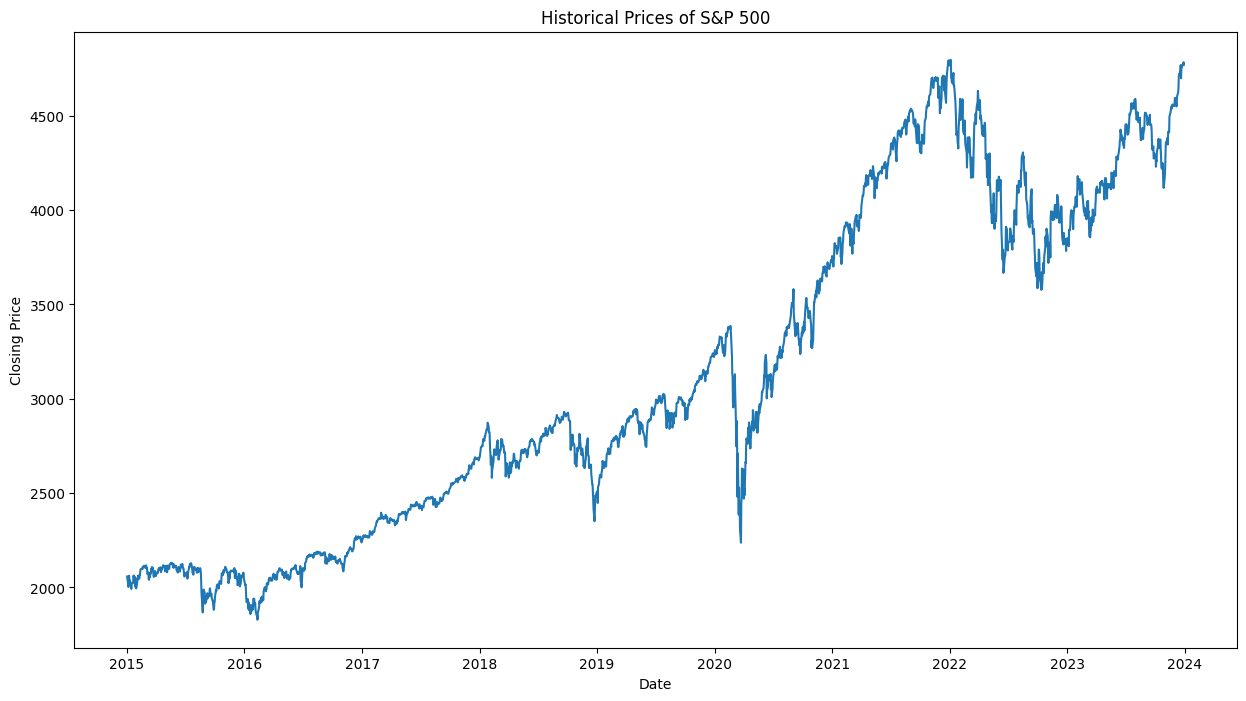

In [9]:
# Plot Historial Prices
plt.figure(figsize=(15, 8))
plt.plot(df['Close'])
plt.title('Historical Prices of S&P 500')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

## 5. ARIMA

In [10]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
import warnings
warnings.filterwarnings('ignore')


In [11]:
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.418372
p-value: 0.906986


Hypothesis test results indicate insufficient evidence to reject the null hypothesis at a significance level of 0.05. Additionally, the time series exhibits non-stationarity.

ADF Statistic: -14.836716
p-value: 0.000000


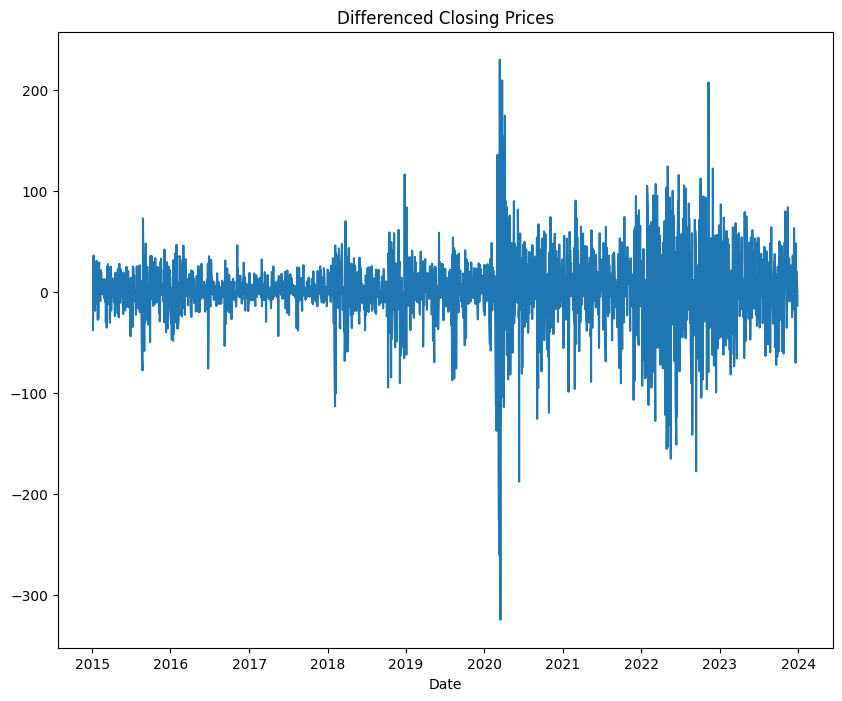

In [12]:
df_diff = df['Close'].diff().dropna()

# Recheck for stationarity
result = adfuller(df_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Plot differenced data
plt.figure(figsize=(10, 8))
plt.plot(df_diff)
plt.title('Differenced Closing Prices')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

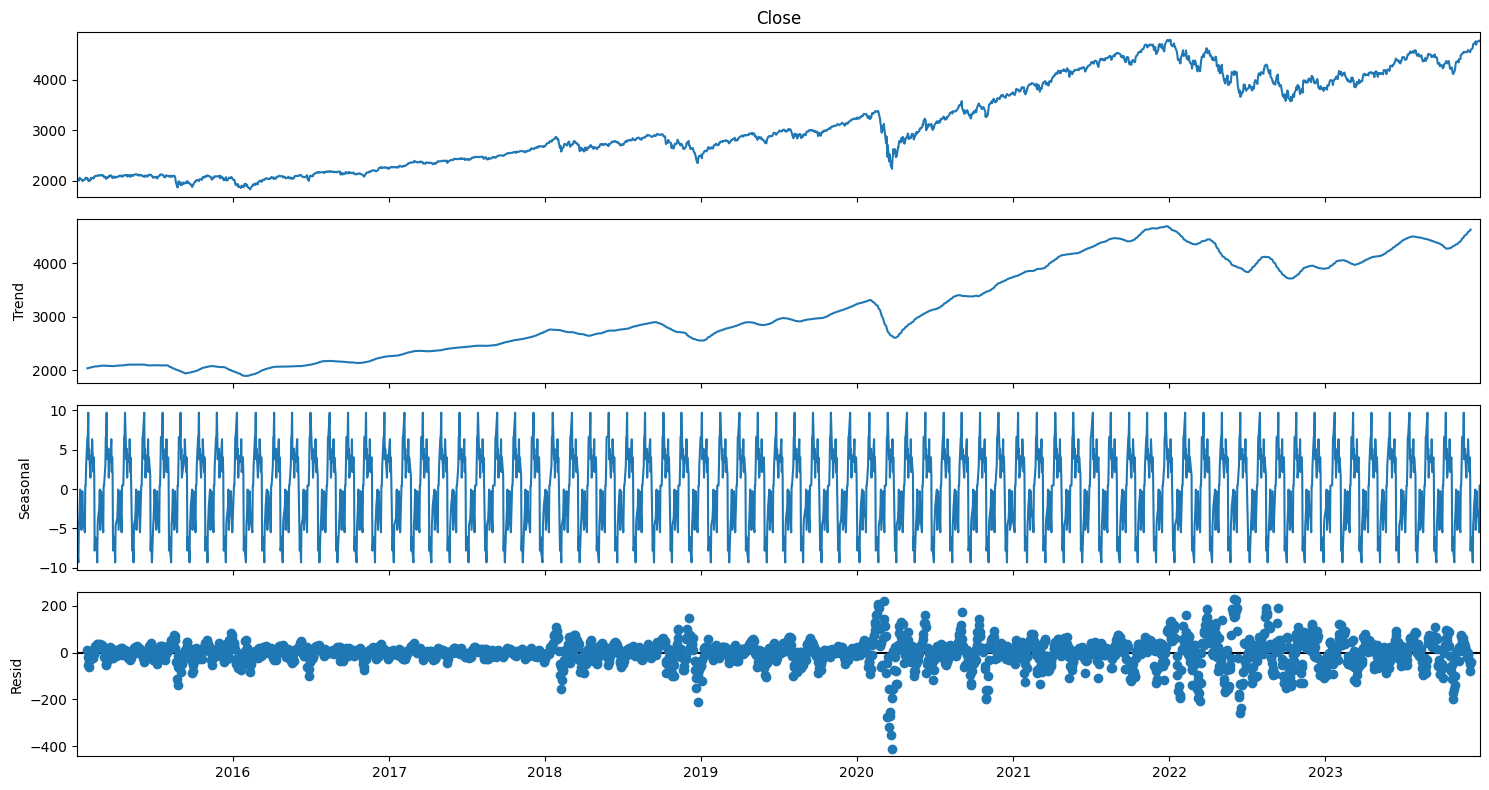

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='additive', period=30)
plt.rcParams["figure.figsize"] = [15, 8]
fig = decomposition.plot()

In [14]:
import pmdarima as pm

# Best ARIMA parameters
auto_arima_model = pm.auto_arima(df.Close,
                              start_p=0, start_q=0,
                              max_p=5, max_q=5,
                              seasonal=True,
                              stepwise=True,
                              suppress_warnings=True,
                              d=0,
                              trace=True)

print(auto_arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=37082.833, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=43034.728, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=22726.299, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=22723.076, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=22723.479, Time=0.42 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=22723.245, Time=0.45 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=22721.751, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=22722.187, Time=0.36 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=29740.146, Time=1.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=22694.713, Time=0.76 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2

In [15]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2264
Model:               SARIMAX(3, 0, 2)   Log Likelihood              -11316.701
Date:                Thu, 04 Jul 2024   AIC                          22647.403
Time:                        17:51:53   BIC                          22687.477
Sample:                             0   HQIC                         22662.025
                               - 2264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7191     12.353      0.220      0.826     -21.493      26.931
ar.L1         -0.7662      0.018    -42.238      0.000      -0.802      -0.731
ar.L2          0.8757      0.006    145.910      0.000       0.864       0.887
ar.L3          0.8897      0.017     52.432      0.000       0.856       0.923
ma.L1          1.6959      0.023     73.710      0.000       1.651       1.741
ma.L2          0.7993      0.022     36.582      0.000       0.756       0.842
sigma2      1285.1447     20.735     61.981      0.000    1244.506    1325.784
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):              3745.11
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               7.95   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
Train_end = 1763 #Index
# Create Training and Test
train = df.Close[:Train_end]
test = df.Close[Train_end:]

In [17]:
test

Date
2022-01-03    4796.560059
2022-01-04    4793.540039
2022-01-05    4700.580078
2022-01-06    4696.049805
2022-01-07    4677.029785
                 ...     
2023-12-22    4754.629883
2023-12-26    4774.750000
2023-12-27    4781.580078
2023-12-28    4783.350098
2023-12-29    4769.830078
Name: Close, Length: 501, dtype: float64

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [19]:
# ARIMA model
best_p, best_d, best_q = auto_arima_model.order
arima_model = ARIMA(train, order=(best_p, best_d, best_q))
arima_model_fit = arima_model.fit()


In [20]:
# Forecast
fc_arima = arima_model_fit.forecast(501, alpha=0.05)  # 95% conf
fc_arima.index = test.index

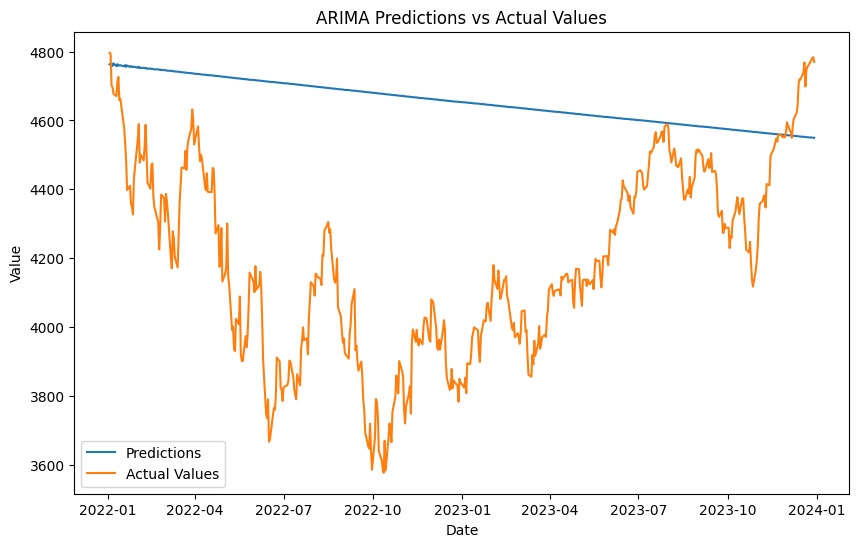

In [21]:
# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar las predicciones y los valores reales en una sola gráfica
plt.plot(fc_arima, label='Predictions')
plt.plot(test, label='Actual Values')

# Añadir etiquetas, título y leyenda
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Predictions vs Actual Values')
plt.legend()

# Mostrar la gráfica
plt.show()

## LSTM

In [22]:
train_end = 1763 #Index
# Create Training and Test
train_data = df['Close'][:train_end]
test_data = df['Close'][train_end:]

In [23]:
test_data

Date
2022-01-03    4796.560059
2022-01-04    4793.540039
2022-01-05    4700.580078
2022-01-06    4696.049805
2022-01-07    4677.029785
                 ...     
2023-12-22    4754.629883
2023-12-26    4774.750000
2023-12-27    4781.580078
2023-12-28    4783.350098
2023-12-29    4769.830078
Name: Close, Length: 501, dtype: float64

In [24]:
# Selecting Price values
dataset_train = train_data.values

# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape


(1763, 1)

In [25]:
# Selecting Price values
dataset_test = test_data.values

# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
dataset_test.shape


(501, 1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
scaled_test = scaler.fit_transform(dataset_test)



In [27]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
	X_train.append(scaled_train[i-50:i, 0])
	y_train.append(scaled_train[i, 0])
	if i <= 51:
		print(X_train)
		print(y_train)
		print()


[array([0.07730146, 0.06460907, 0.05854629, 0.06640398, 0.07863074,
       0.07278392, 0.0672002 , 0.06543569, 0.06146805, 0.05519271,
       0.06421773, 0.06527375, 0.0685025 , 0.0789715 , 0.07514899,
       0.07692701, 0.06763544, 0.05839448, 0.06483513, 0.05597542,
       0.06470017, 0.07454506, 0.07167054, 0.07875898, 0.07638041,
       0.07343505, 0.08080693, 0.08078667, 0.08751746, 0.09038861,
       0.09151888, 0.09129615, 0.09054379, 0.09487921, 0.09466324,
       0.09662684, 0.09608032, 0.09502764, 0.09292237, 0.09727121,
       0.094029  , 0.09090819, 0.09175503, 0.08170772, 0.08446412,
       0.07256462, 0.07124206, 0.07991619, 0.075682  , 0.08505792])]
[0.08272662594196878]

[array([0.07730146, 0.06460907, 0.05854629, 0.06640398, 0.07863074,
       0.07278392, 0.0672002 , 0.06543569, 0.06146805, 0.05519271,
       0.06421773, 0.06527375, 0.0685025 , 0.0789715 , 0.07514899,
       0.07692701, 0.06763544, 0.05839448, 0.06483513, 0.05597542,
       0.06470017, 0.07454506, 0.07

In [28]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])


In [29]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (1713, 50, 1) y_train : (1713, 1)


In [30]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (451, 50, 1) y_test : (451, 1)


In [31]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


2024-07-04 17:51:54.427101: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-04 17:51:54.433734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 17:51:54.442218: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 17:51:54.442237: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-04 17:51:54.448509: I tensorflow/core/platform/cpu_feature_gua

In [32]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								decay=1e-6, 
								momentum=0.9, 
								nesterov=True), 
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()


Epoch 1/20


2024-07-04 17:51:55.674263: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-04 17:51:55.769910: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


857/857 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0136
Epoch 2/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0016
Epoch 3/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 9.8297e-04
Epoch 4/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 9.4045e-04
Epoch 5/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 8.2393e-04
Epoch 6/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 6.9941e-04
Epoch 7/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 6.9829e-04
Epoch 8/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 8.1549e-04
Epoch 9/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 6.4103e-04
Epoch 10/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 6.1222e-04
Epoch 11/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 5.8561e-04
Epoch 12/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 5.8497e-04
Epoch 13/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 5.7350e-04
Epoch 14/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 5.5

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

In [33]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
					return_sequences = True, 
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train, 
				y_train, 
				batch_size = 1, 
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0012 - loss: 0.0084
Epoch 2/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 6.4761e-04 - loss: 7.2294e-04
Epoch 3/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 8.8511e-04 - loss: 5.3997e-04
Epoch 4/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 3.5425e-04 - loss: 5.1842e-04
Epoch 5/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0017 - loss: 4.5730e-04
Epoch 6/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 8.1241e-04 - loss: 3.5432e-04
Epoch 7/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0015 - loss: 3.5856e-04
Epoch 8/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0012 - loss: 2.5012e-04
Epoch 9/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 7.2090e-05 - loss: 3.3976e-04
Epoch 10/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 8.2796e-04 - loss: 3.2131e-04
Epoch 11/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6m

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [34]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [35]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 


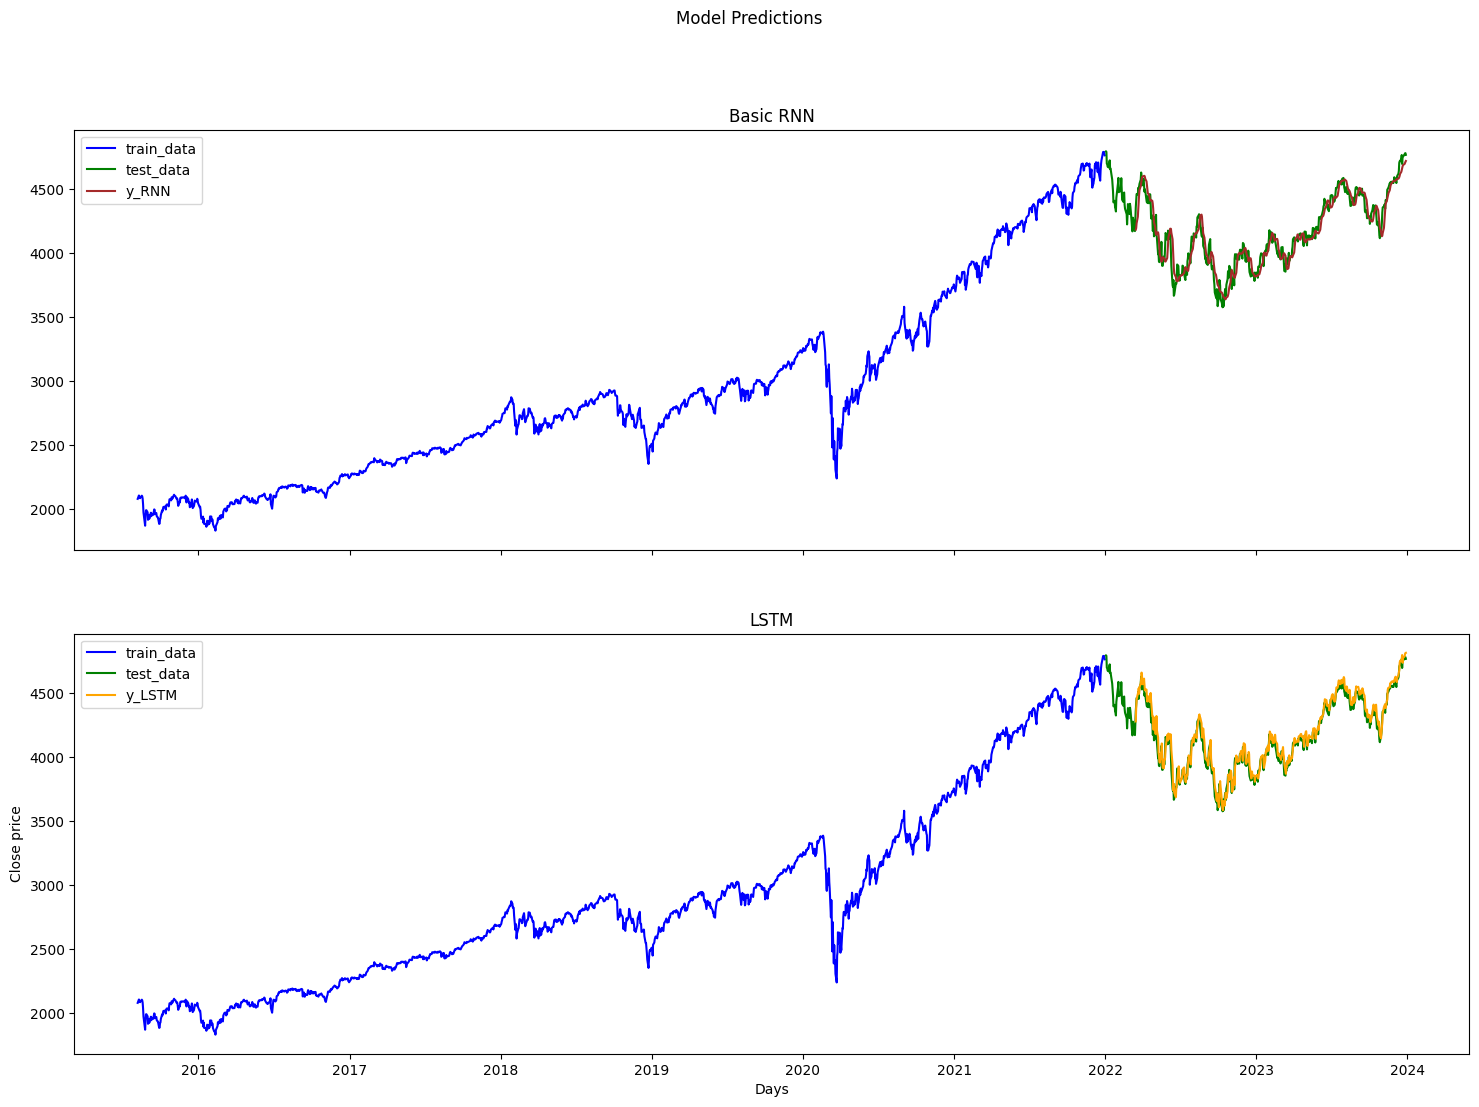

In [38]:
fig, axs = plt.subplots(2,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

plt.xlabel("Days")
plt.ylabel("Close price")

plt.show()


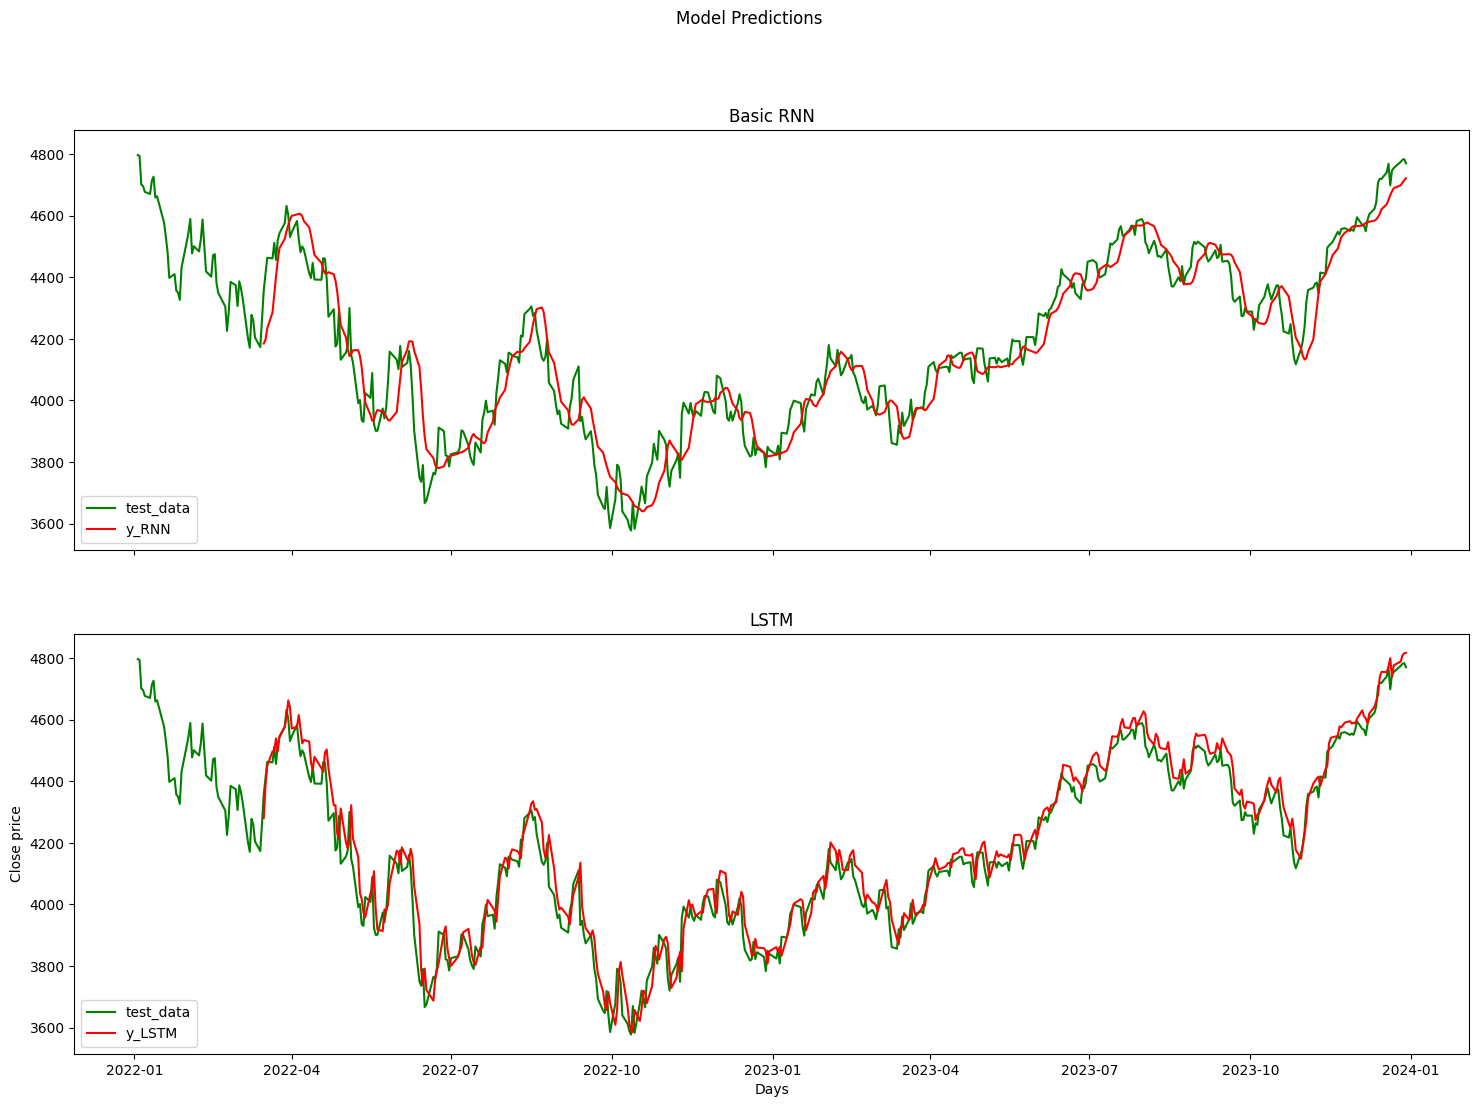

In [40]:
fig, axs = plt.subplots(2,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(test_data.index, test_data, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "r")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(test_data.index, test_data, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "r")
axs[1].legend()
axs[1].title.set_text("LSTM")

plt.xlabel("Days")
plt.ylabel("Close price")

plt.show()
